In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles
from ripser import ripser
from persim import plot_diagrams
import tadasets

Text(0.5, 1.0, 'point cloud')

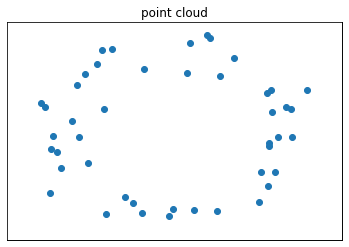

In [3]:
# This generates a sample point cloud

list_of_points, doof = make_circles(n_samples=45, factor=0.9, noise=0.13, random_state=2)
    
x_vals = [x[0] for x in list_of_points]
y_vals = [x[1] for x in list_of_points]


fig = plt.figure()
plt.tick_params(bottom = False, top = False, left = False, right = False, labelbottom=False, labelleft=False)
ax = plt.axes(xlim=(-1.3, 1.3), ylim=(-1.3, 1.3))

ax.scatter(x_vals, y_vals)

ax.tick_params(bottom = False, top = False, left = False, right = False, labelbottom=False, labelleft=False)
plt.title('point cloud')

Text(0.5, 1.0, 'radius = 0.21')

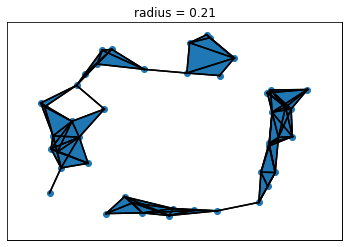

In [6]:
## HOMEWORK PROBLEM 3 IS ABOUT THIS CELL ##

## This cell will draw the Cech complex of various radii on the point cloud above ##

#Choose radius below
radius = 0.21



r = radius
list_of_points, doof = make_circles(n_samples=45, factor=0.9, noise=0.13, random_state=2)
    
x_vals = [x[0] for x in list_of_points]
y_vals = [x[1] for x in list_of_points]


fig = plt.figure()
plt.tick_params(bottom = False, top = False, left = False, right = False, labelbottom=False, labelleft=False)
ax = plt.axes(xlim=(-1.3, 1.3), ylim=(-1.3, 1.3))

ax.scatter(x_vals, y_vals)

ax.tick_params(bottom = False, top = False, left = False, right = False, labelbottom=False, labelleft=False)

for v1_index in range(len(list_of_points)):
    v1x = list_of_points[v1_index][0]
    v1y = list_of_points[v1_index][1]
    for v2_index in range(len(list_of_points)):
        v2x = list_of_points[v2_index][0]
        v2y = list_of_points[v2_index][1]
        if np.sqrt((v1x-v2x)**2 + (v1y-v2y)**2) <= 2*r:
            ax.plot([v1x, v2x], [v1y, v2y], color='k')
        for v3_index in range(len(list_of_points)):
            v3x = list_of_points[v3_index][0]
            v3y = list_of_points[v3_index][1]
            if np.sqrt((v1x-v2x)**2 + (v1y-v2y)**2) <= 2*r and np.sqrt((v1x-v3x)**2 + (v1y-v3y)**2) <= 2*r and np.sqrt((v2x-v3x)**2 + (v2y-v3y)**2) <= 2*r:
                vertices = [[v1x, v1y], [v2x, v2y], [v3x, v3y]]
                polygon = plt.Polygon(vertices)
                ax.add_patch(polygon)

plt.title('radius = %s' % r)


In [7]:
# Ripser calculation

result = ripser(list_of_points, coeff=17)
diagrams = result['dgms']

<AxesSubplot:title={'center':'Dimension 0 barcode'}>

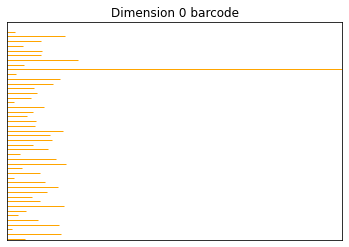

In [8]:
# HOMEWORK PROBLEM 4 IS ABOUT THIS CELL

dimension = 0

num_bars = len(diagrams[dimension])
fig, ax = plt.subplots()
ax.set(xlim=(0,2), ylim = (-0.2,num_bars+1))
list_of_bars = []
for index in range(num_bars):
    list_of_bars.append(index)
np.random.shuffle(list_of_bars)
counter = 0
for bar_index in list_of_bars:
    if diagrams[dimension][bar_index][1] != float('inf'):
        birth = diagrams[dimension][bar_index][0]
        death = diagrams[dimension][bar_index][1]
        plt.hlines(y=counter, xmin = birth, xmax = death, linewidth = 1, color = 'orange')
        counter = counter + 1
    else:
        birth = diagrams[dimension][bar_index][0]
        death = 2
        plt.hlines(y=counter, xmin = birth, xmax = death, linewidth = 1, color = 'orange')
        counter = counter + 1
plt.tick_params(left = False, bottom = False, labelbottom = False, labelleft = False)
plt.title('Dimension %s barcode' %dimension)
ax

<AxesSubplot:title={'center':'Dimension 1 barcode'}>

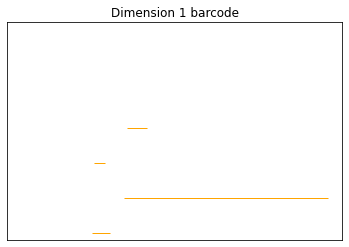

In [10]:
# HOMEWORK PROBLEM 4 IS ABOUT THIS CELL

dimension = 1

num_bars = len(diagrams[dimension])
fig, ax = plt.subplots()
ax.set(xlim=(0,1.4), ylim = (-0.2,num_bars+1))
list_of_bars = []
for index in range(num_bars):
    list_of_bars.append(index)
np.random.shuffle(list_of_bars)
counter = 0
for bar_index in list_of_bars:
    if diagrams[dimension][bar_index][1] != float('inf'):
        birth = diagrams[dimension][bar_index][0]
        death = diagrams[dimension][bar_index][1]
        plt.hlines(y=counter, xmin = birth, xmax = death, linewidth = 1, color = 'orange')
        counter = counter + 1
    else:
        birth = diagrams[dimension][bar_index][0]
        death = 2
        plt.hlines(y=counter, xmin = birth, xmax = death, linewidth = 1, color = 'orange')
        counter = counter + 1
plt.tick_params(left = False, bottom = False, labelbottom = False, labelleft = False)
plt.title('Dimension %s barcode' %dimension)
ax